# Proje 2 - Scikit-learn ile Makine Öğrenmesi

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi 09.07.2021 Cuma saat 15:00’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 12.07.2021 Pazartesi saat 15:00’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir.
* Projeler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu projelerin notunda aynı oranda kesinti yapılacaktır veya bu projeler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  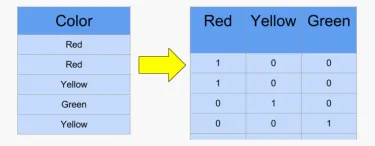
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

In [149]:
#csv dosyasının okunması
#her bir soru için bu kodun çalıştırılması gerekebilir. Her soru için one hot encoding işlemi yapıldığı için bu satır 
#çalıştırılmazsa hata çıkabilir.
import pandas as pd
import numpy as np

veri = pd.read_csv('insan_kaynaklari.csv')


### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

In [150]:
# bu soru lineer regresyon olacak => ilk modelde kullanılması gereken x değerleri : maas_derecesi, aylik_ort_calisma_saati, 
# son_5_yilda_terfi_aldi, sirkette_calistigi_yil_sayisi, is_kazasina_ugradi, y değeri : memnuniyet_duzeyi

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

soru1 = veri
#maas derecesi için gerekli olan one one-hot encoding işlemi:
n_column = pd.get_dummies(soru1['maas_derecesi'])
soru1 = soru1.drop('maas_derecesi', axis=1)
soru1 = soru1.join(n_column)


In [151]:
#normalizasyon işlemlerinin yapılması:
norm_list = ['aylik_ort_calisma_saati', 'sirkette_calistigi_yil_sayisi', 'gerceklestirdigi_proje_sayisi']
for x in norm_list:
    yeni_deger = soru1[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru1[x] = yeni_deger
      
#regresyon için X ve y değerlerinin datadan alınması :
X = soru1.iloc[:,[2, 3, 4, 5, 6 ,7, 9, 10, 11]].values # aldığı derece ve calistigi_bolum dışındaki tüm kolonlar
y = soru1.iloc[:,0].values.reshape(-1, 1) #memnuniyet düzeyi

#train-test split işlemi
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#lineer regression modeli
lr_model1 = LinearRegression()
lr_model1.fit(X, y)   
folds = KFold(n_splits = 10, shuffle = True, random_state = 0)
scores = cross_val_score(lr_model, X, y, scoring='r2', cv=folds)
scores


array([0.20162401, 0.14889442, 0.16616572, 0.11767142, 0.19958568,
       0.19360926, 0.14877597, 0.17628312, 0.18071002, 0.18922765])

In [152]:
#farklı özniteliklerle model denemesi:
#ilk modele göre calıstığı bölüm dışındaki tüm columnlar kullanılmıştır.
norm_list2 = ['aylik_ort_calisma_saati', 'sirkette_calistigi_yil_sayisi', 'gerceklestirdigi_proje_sayisi', 'aldigi_degerlendirme_puani', 'memnuniyet_duzeyi']
for x in norm_list2:
    yeni_deger = soru1[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru1[x] = yeni_deger
    
#regresyon için X ve y değerlerinin datadan alınması :
X = soru1.iloc[:, [1, 2, 3, 4, 5, 6 ,7, 9, 10, 11]].values # calıştığı bölüm dışındaki tüm kolonlar 
y = soru1.iloc[:,0].values.reshape(-1 ,1) #memnuniyet düzeyi

#train-test split işlemi
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#lineer regression modeli
lr_model2 = LinearRegression()
lr_model2.fit(X, y)   
folds = KFold(n_splits = 10, shuffle = True, random_state = 0)
scores = cross_val_score(lr_model, X, y, scoring='r2', cv=folds)
scores


array([0.21948038, 0.17336868, 0.19595997, 0.1530278 , 0.22134539,
       0.20413219, 0.16951548, 0.19403635, 0.21489662, 0.21059429])

In [153]:
#farklı özniteliklerle model denemesi:
#üstteki modele göre maas derecesinin yanında calıstığı bölüm de kullanılmıs ve diğer tüm columnlar da modelde kullanılmıştır.
n_column = pd.get_dummies(soru1['calistigi_bolum'])
soru1 = soru1.drop('calistigi_bolum', axis=1)
soru1 = soru1.join(n_column)

norm_list2 = ['aylik_ort_calisma_saati', 'sirkette_calistigi_yil_sayisi', 'gerceklestirdigi_proje_sayisi', 'aldigi_degerlendirme_puani', 'memnuniyet_duzeyi']
for x in norm_list2:
    yeni_deger = soru1[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru1[x] = yeni_deger
    
#regresyon için X ve y değerlerinin datadan alınması :
X = soru1.iloc[:, 1:].values #tüm kolonlar 
y = soru1.iloc[:,0].values.reshape(-1 ,1) #memnuniyet düzeyi

#train-test split işlemi
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#lineer regression modeli
lr_model3 = LinearRegression()
lr_model3.fit(X, y)   
folds = KFold(n_splits = 10, shuffle = True, random_state = 0)
scores = cross_val_score(lr_model, X, y, scoring='r2', cv=folds)
scores


array([0.21941548, 0.17481475, 0.19590794, 0.15191366, 0.22110728,
       0.2040901 , 0.17060251, 0.19139147, 0.21374537, 0.20964662])

### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

In [157]:
#burası lojistik regresyon olacak
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

soru2 = veri 
#maas derecesi için gerekli olan one one-hot encoding işlemi:
n_column = pd.get_dummies(soru2['maas_derecesi'])
soru2 = soru2.drop('maas_derecesi', axis=1)
soru2 = soru2.join(n_column)


In [158]:
#normalizasyon işlemlerinin yapılması:
norm_list = ['aylik_ort_calisma_saati', 'memnuniyet_duzeyi', 'sirkette_calistigi_yil_sayisi', 'aldigi_degerlendirme_puani']
for x in norm_list:
    yeni_deger = soru2[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru2[x] = yeni_deger
soru2.head()

#regresyon için X ve y değerlerinin datadan alınması :
X = soru2.iloc[:,[0, 1, 2, 3, 4, 5, 7, 9, 10, 11]].values # calistigi_bolum dışındaki tüm kolonlar
y = soru2.iloc[:,6].values.reshape(-1, 1) #sirketten_ayrildi

logit1 = LogisticRegression()
logit1.fit(X,y.ravel())

cv_results = cross_val_score(logit1, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=10, # #cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results


array([0.80133333, 0.78933333, 0.79266667, 0.786     , 0.80333333,
       0.79666667, 0.79333333, 0.78733333, 0.744     , 0.73515677])

In [159]:
#önceki modele göre diğer columnların yanına çalıştığı bölümde eklenmiştir, onunda one hot encoding işlemi burada yapılacaktır
n_column = pd.get_dummies(soru2['calistigi_bolum'])
soru2 = soru2.drop('calistigi_bolum', axis=1)
soru2 = soru2.join(n_column)

norm_list = ['aylik_ort_calisma_saati', 'memnuniyet_duzeyi', 'sirkette_calistigi_yil_sayisi', 'aldigi_degerlendirme_puani']
for x in norm_list:
    yeni_deger = soru2[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru2[x] = yeni_deger
soru2.head()

#regresyon için X ve y değerlerinin datadan alınması :
X = soru2.iloc[:,[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]] # calistigi_bolum dışındaki tüm kolonlar
y = soru2.iloc[:,6] #sirketten_ayrildi

logit2 = LogisticRegression()
logit2.fit(X,y)

cv_results = cross_val_score(logit2, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=10, # #cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results


array([0.80666667, 0.79066667, 0.79466667, 0.78733333, 0.806     ,
       0.80733333, 0.79333333, 0.79066667, 0.74666667, 0.73649099])

### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [160]:
#burası sınıflandırma olacak
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

soru3 = veri 
n_c = pd.get_dummies(soru3['calistigi_bolum'])
soru3 = soru3.drop('calistigi_bolum', axis=1)
soru3 = soru3.join(n_c)


In [161]:
#normalizasyon işlemlerinin yapılması:
norm_list = ['aylik_ort_calisma_saati', 'aldigi_degerlendirme_puani', 'sirkette_calistigi_yil_sayisi', ]

for x in norm_list:
    yeni_deger = soru3[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru3[x] = yeni_deger
soru3.head()

#regresyon için X ve y değerlerinin datadan alınması :
X = soru3.iloc[:,[1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].values # maas_derecesi, aylik_ort_calisma_saati, son_5_yilda_terfi_aldi, sirkette_calistigi_yil_sayisi, is_kazasina_ugradi
y = soru3.iloc[:,8].values.reshape(-1 ,1) #maas dereceleri
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [162]:
logit = LogisticRegression(solver='lbfgs',max_iter=500)
logit.fit(X, y.ravel())
cv_results = cross_val_score(logit, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=10, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results


array([0.47933333, 0.472     , 0.51133333, 0.44066667, 0.488     ,
       0.43866667, 0.47733333, 0.50466667, 0.51333333, 0.52168112])

In [163]:
#farklı bir model oluşturmak için k nearest kullanıldı:
knn = KNeighborsClassifier()
knn.fit(X,y.ravel())
cv_results = cross_val_score(knn, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=10, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results

array([0.58133333, 0.44266667, 0.44      , 0.44      , 0.43066667,
       0.446     , 0.446     , 0.624     , 0.69      , 0.70246831])

In [164]:
#ek olarak aynı veriler ile decision tree denemesi de yapıldı
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
cv_results = cross_val_score(clf, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=10, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results

array([0.69466667, 0.46933333, 0.42733333, 0.40933333, 0.412     ,
       0.422     , 0.46866667, 0.934     , 0.99066667, 0.98932622])

### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

In [165]:
#burası kümeleme olacak
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

soru4 = veri.iloc[:, 0:2]

#normalizasyon işlemlerinin yapılması 
norm_list = [ 'memnuniyet_duzeyi', 'aldigi_degerlendirme_puani']
for x in norm_list:
    yeni_deger = soru4[x]
    ort = np.mean(yeni_deger,axis=0)
    stds = np.std(yeni_deger, axis=0)
    yeni_deger = (yeni_deger - ort) / stds
    soru4[x] = yeni_deger
X = soru4.values


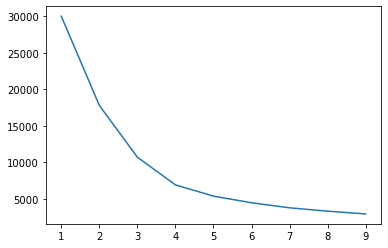

In [166]:
#elbow tekniği
costs = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    costs.append(model.inertia_)
plt.plot(np.arange(1,10), costs)

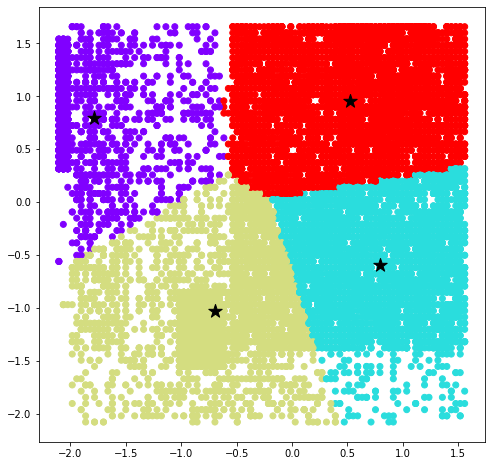

In [167]:
# k= 4 için
km_model = KMeans(n_clusters=4)
km_model.fit(X)
centers = km_model.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='*')

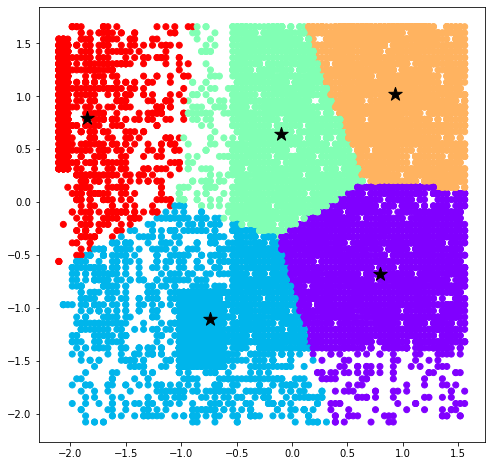

In [168]:
# k = 5 için
km_model = KMeans(n_clusters=5)
km_model.fit(X)
centers = km_model.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='*')

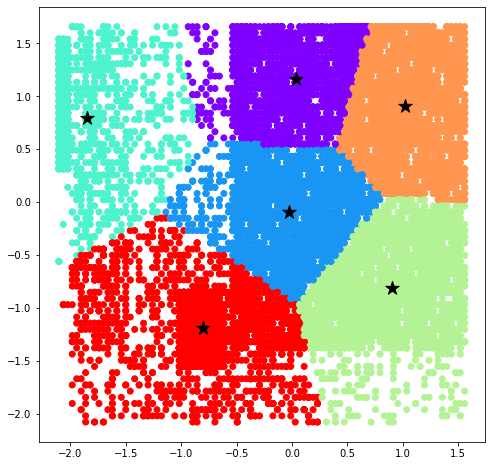

In [169]:
#k = 6 için
km_model = KMeans(n_clusters=6)
km_model.fit(X)
centers = km_model.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='*')

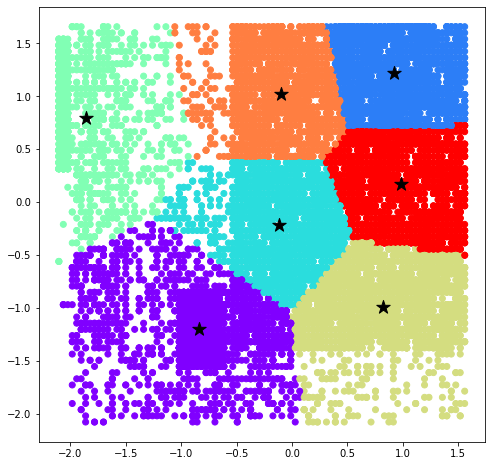

In [170]:
#k = 7 
km_model = KMeans(n_clusters=7)
km_model.fit(X)
centers = km_model.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='*')

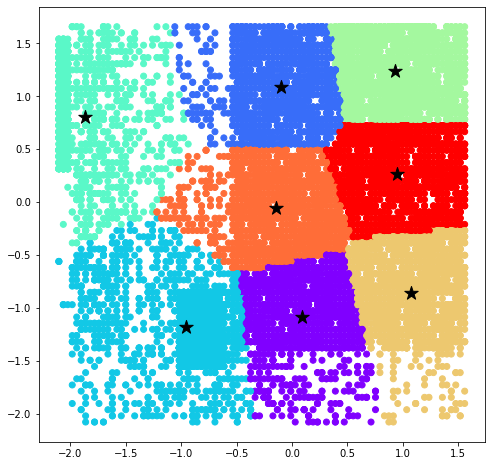

In [171]:
km_model = KMeans(n_clusters=8)
km_model.fit(X)
centers = km_model.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='*')

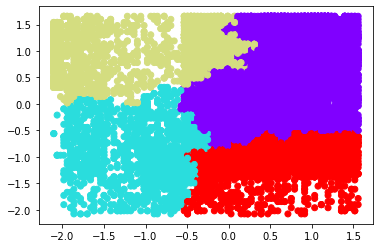

In [174]:
#Hierarchical Clustering yöntemi ile farklı bir model oluşturma
model1 = AgglomerativeClustering(n_clusters=4, linkage='complete')
model1.fit(X)
plt.scatter(X[:,0], X[:,1], c=model1.labels_, cmap='rainbow')

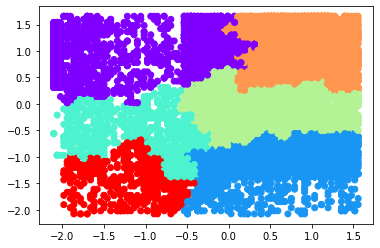

In [175]:
#farklı cluster değeri ile Hierarchical Clustering modeli
model2 = AgglomerativeClustering(n_clusters=6, linkage='complete')
model2.fit(X)
plt.scatter(X[:,0], X[:,1], c=model2.labels_, cmap='rainbow')